In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv('/content/drive/MyDrive/dataset/dataset_15_Gardening Services.csv')
data.head()

,Date,Product,Region,Customer_Type,Quantity,Price,Discount,Revenue
0,2024-07-19,Lawn Care,North,Commercial,18,1112.41,0.20,16018.70
1,2024-11-05,Landscape Design,West,Commercial,14,197.90,0.05,2632.07
2,2024-11-05,Pest Control,West,Residential,17,273.59,0.12,4092.91
3,2024-02-28,Landscape Design,East,Commercial,20,791.81,0.08,14569.30
4,2024-12-25,Pest Control,North,Commercial,11,1921.72,0.16,17756.69


In [10]:
data.info()
data.describe()
data.isnull().sum()
data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


Index(['Date', 'Product', 'Region', 'Customer_Type', 'Quantity', 'Price',
       'Discount', 'Revenue'],
      dtype='object')

In [11]:

print("Missing values before handling:\n", data.isnull().sum())

data.fillna(data.mean(numeric_only=True), inplace=True)

print(f"Shape before removing duplicates: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {data.shape}")

data['Date'] = pd.to_datetime(data['Date'])
print("Data types after conversion:\n", data.dtypes)


Missing values before handling:
 Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64
Shape before removing duplicates: (1000, 8)
Shape after removing duplicates: (1000, 8)
Data types after conversion:
 Date             datetime64[ns]
Product                  object
Region                   object
Customer_Type            object
Quantity                  int64
Price                   float64
Discount                float64
Revenue                 float64
dtype: object


In [12]:
# Group by analysis: Sales by product
sales_by_product = data.groupby('Product')['Revenue'].sum()
print("Sales by Product:\n", sales_by_product)

# Correlation matrix
correlation = data[['Quantity', 'Price', 'Discount', 'Revenue']].corr()
print("Correlation Matrix:\n", correlation)


Sales by Product:
 Product
Landscape Design    3066043.46
Lawn Care           3010190.71
Pest Control        2889526.77
Name: Revenue, dtype: float64
Correlation Matrix:
           Quantity     Price  Discount   Revenue
Quantity  1.000000 -0.037729 -0.011727  0.629700
Price    -0.037729  1.000000  0.003658  0.643854
Discount -0.011727  0.003658  1.000000 -0.120393
Revenue   0.629700  0.643854 -0.120393  1.000000


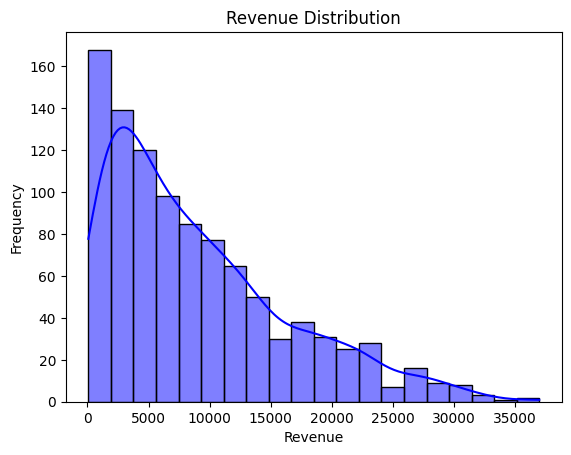

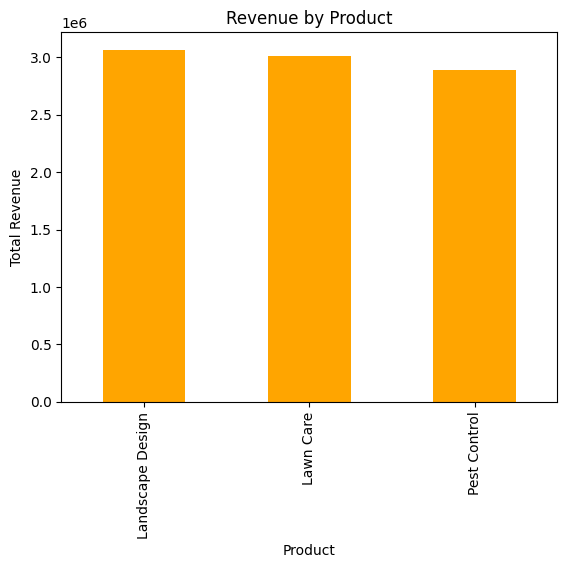

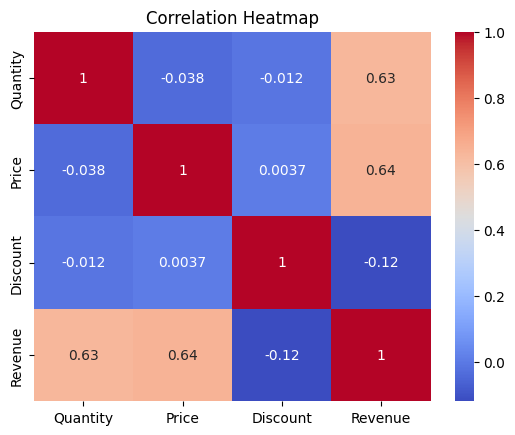

In [13]:
sns.histplot(data['Revenue'], bins=20, kde=True, color='blue')
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# Bar chart
sales_by_product.plot(kind='bar', color='orange')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.show()

# Correlation heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [14]:
print("Key Insights:")
print("- Products contributing the most to revenue are likely the most profitable or popular.")
print("- The revenue distribution helps identify outliers or trends in sales performance.")
print("- The correlation matrix highlights relationships, such as how price or discount impacts revenue.")


Key Insights:
- Products contributing the most to revenue are likely the most profitable or popular.
- The revenue distribution helps identify outliers or trends in sales performance.
- The correlation matrix highlights relationships, such as how price or discount impacts revenue.
